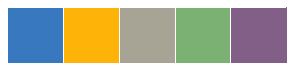

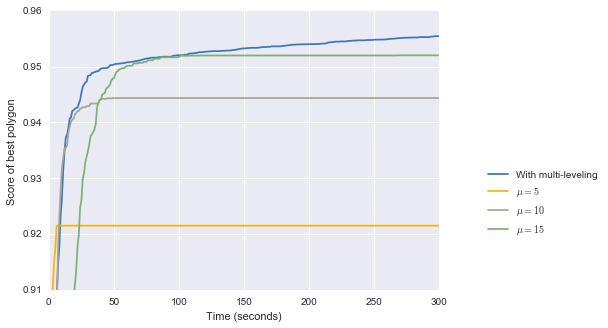

In [2]:
%matplotlib inline


from acoc import acoc_plotter as plotter
import numpy as np
#import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import os.path as osp

def sinplot():
    data = pickle.load(open(osp.join('C:\\Users\Guro\Dropbox\ACOC\experiments\\', '02.19, multileveling server/results.pickle'), 'rb'))
    data = np.array(data)
    # data = data[1:7]
    data = np.take(data, [0,2,3,4], axis=0)

    data = data.T[0:300].T
    x = range(data.shape[1])
    
    sns.set_style("darkgrid", {"axes.facecolor": ".9"})
    colors = ["windows blue", "amber", "greyish", "faded green", "dusty purple"]
    sns.palplot(sns.xkcd_palette(colors))
    sns.set(rc={"figure.figsize": (7, 5)})
    sns.set_palette(sns.xkcd_palette(colors))
    
    labels = [
              'With multi-leveling', 
              r'$\mu = 5$', 
              r'$\mu = 10$', 
              r'$\mu = 15$',
              r'$\mu = 30$',
              r'$\mu = 60$'
             ]
    fig, ax = plt.subplots()
    
    ax.set_xlabel('Time (seconds)')
    ax.set_ylabel('Score of best polygon')
    ax.set_ylim([0.91,0.96])
    
    for i in range(data.shape[0]):
        plt.plot(x, data[i], label=labels[i])
    legend = plt.legend(labels, loc='best',  bbox_to_anchor=(1.1, 0.46))
        
sinplot()
#fig.savefig('multileveling_small_bw.eps', bbox_extra_artists=(legend,), bbox_inches='tight')

(3, 100)


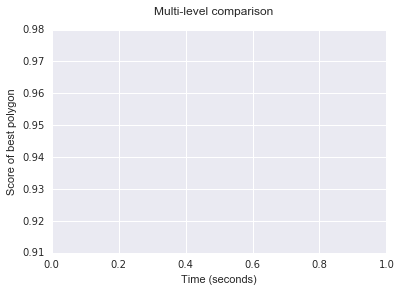

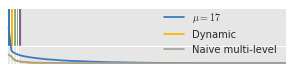

In [5]:
%matplotlib inline
import matplotlib
import numpy as np
import pickle
import os.path as osp
from cycler import cycler
#from PIL import Image
import matplotlib.cm as cm
import seaborn as sns 

from matplotlib import pyplot as plt

run1_data = pickle.load(open(osp.join('C:\\Users\Guro\Dropbox\ACOC\experiments\\', '02.24, multilevel med nest grid/results.pickle'), 'rb'))
run2_data = pickle.load(open(osp.join('C:\\Users\Guro\Dropbox\ACOC\experiments\\', '02.24, multilevel med nest grid/run2/results.pickle'), 'rb'))

run1_data = np.array(run1_data)
run2_data = np.array(run2_data)

run1_data = np.take(run1_data, [2], axis=0)

data = np.concatenate((run1_data, run2_data))

x = range(data.shape[1])
print(data.shape)

labels = [
          r'$\mu = 17$',
          'Dynamic',
          'Naive multi-level'
         ]
fig, ax = plt.subplots()

# plotter.hide_top_and_right_axis(ax)
fig.suptitle("Multi-level comparison")
ax.set_xlabel('Time (seconds)')
ax.set_ylabel('Score of best polygon')

sns.set_style("darkgrid", {"axes.facecolor": ".9"})
colors = ["windows blue", "amber", "greyish", "faded green", "dusty purple"]
sns.palplot(sns.xkcd_palette(colors))
sns.set(rc={"figure.figsize": (7, 5)})
sns.set_palette(sns.xkcd_palette(colors))

ax.set_ylim([0.91,0.98])

for i in range(data.shape[0]):
    plt.plot(x, data[i])
    
plt.legend(labels, loc='lower right')

In [ ]:
%matplotlib inline
import matplotlib
import numpy as np
import pickle
import os.path as osp
from cycler import cycler
from config import SAVE_DIR
#from PIL import Image
import matplotlib.cm as cm

from matplotlib import pyplot as plt

from acoc import acoc_plotter as plotter

data = pickle.load(open(osp.join('C:\\Users\Guro\Dropbox\ACOC\experiments\\', '02.19, multileveling server/results.pickle'), 'rb'))
dynamic_nested = pickle.load(open(osp.join('C:\\Users\Guro\Dropbox\ACOC\experiments\\', '02.24, multilevel med nest grid/run2/results.pickle'), 'rb'))


data_small = np.array(data)[:,:100]

data = np.take(data_small, [0, 4], axis=0)

data = np.concatenate((np.array(dynamic_nested), data))

x = range(data.shape[1])


labels = [
          'Dynamic nested',
          'Naive multi-level',
          'Static nested',
          r'$\mu = 15$'
         ]
fig, ax = plt.subplots()

# plotter.hide_top_and_right_axis(ax)
fig.suptitle("Multi-level comparison")
ax.yaxis.grid(color='gray')
ax.set_xlabel('Time (seconds)')
ax.set_ylabel('Score of best polygon')
ax.set_prop_cycle(cycler('color', ['r','g', 'b', 'k']) + cycler('linestyle', ['-.','-', '--', ':']) + cycler('lw', ['2','2','2','2']))

ax.set_ylim([0.91,0.98])

for i in range(data.shape[0]):
    plt.plot(x, data[i])
    
# lgd = plt.legend(labels, loc='lower right')

# filename = 'multileveling_large.eps'
# fig.savefig(filename)